# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')
x_train=x_train/255.0
x_test=x_test/255.0

169001437/169001437 [==============================] - 2s 0us/step


2. Check if there are 20 labels in y_train using np.unique().

In [3]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
print(y_train.shape)
print(y_train)

(50000, 1)
[[11]
 [15]
 [ 4]
 ...
 [ 8]
 [ 7]
 [ 1]]


In [ ]:
print(x_train.shape)
print(x_train)

(50000, 32, 32, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 2

In [ ]:
print(len(x_train))

50000


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

<ipython-input-37-77e4e53b603b>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n=int(y_train[i])


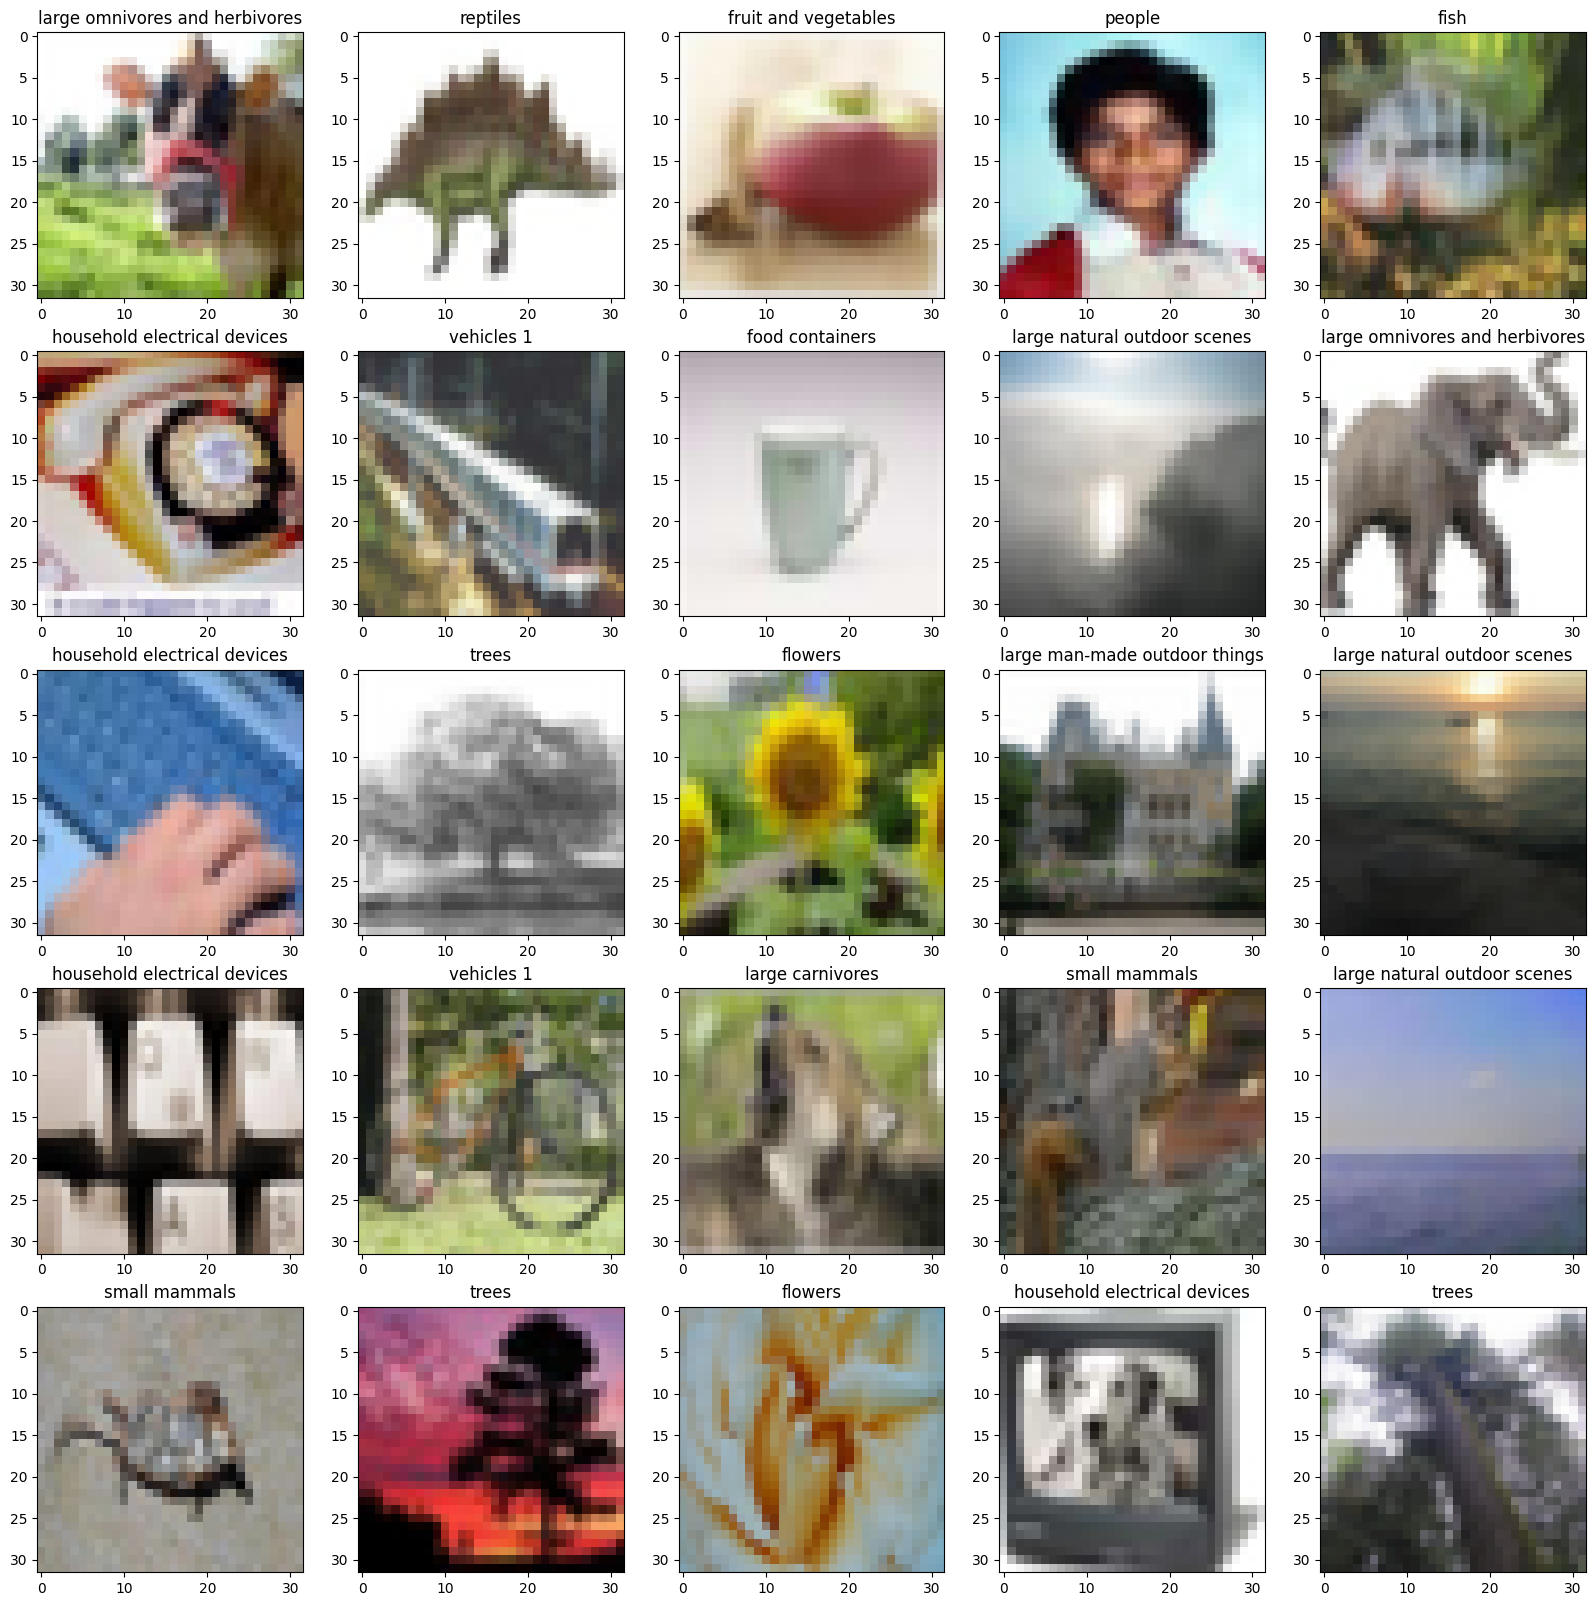

In [ ]:
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices", "household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]
plt.figure(figsize=(20, 20))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  fromi=x_train[i]
  new_image = Image.fromarray(fromi)
  plt.imshow(new_image)
  n=int(y_train[i])
  plt.title(class_names[n])
plt.show()


<ipython-input-38-f81223796c64>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n=int(y_test[i])


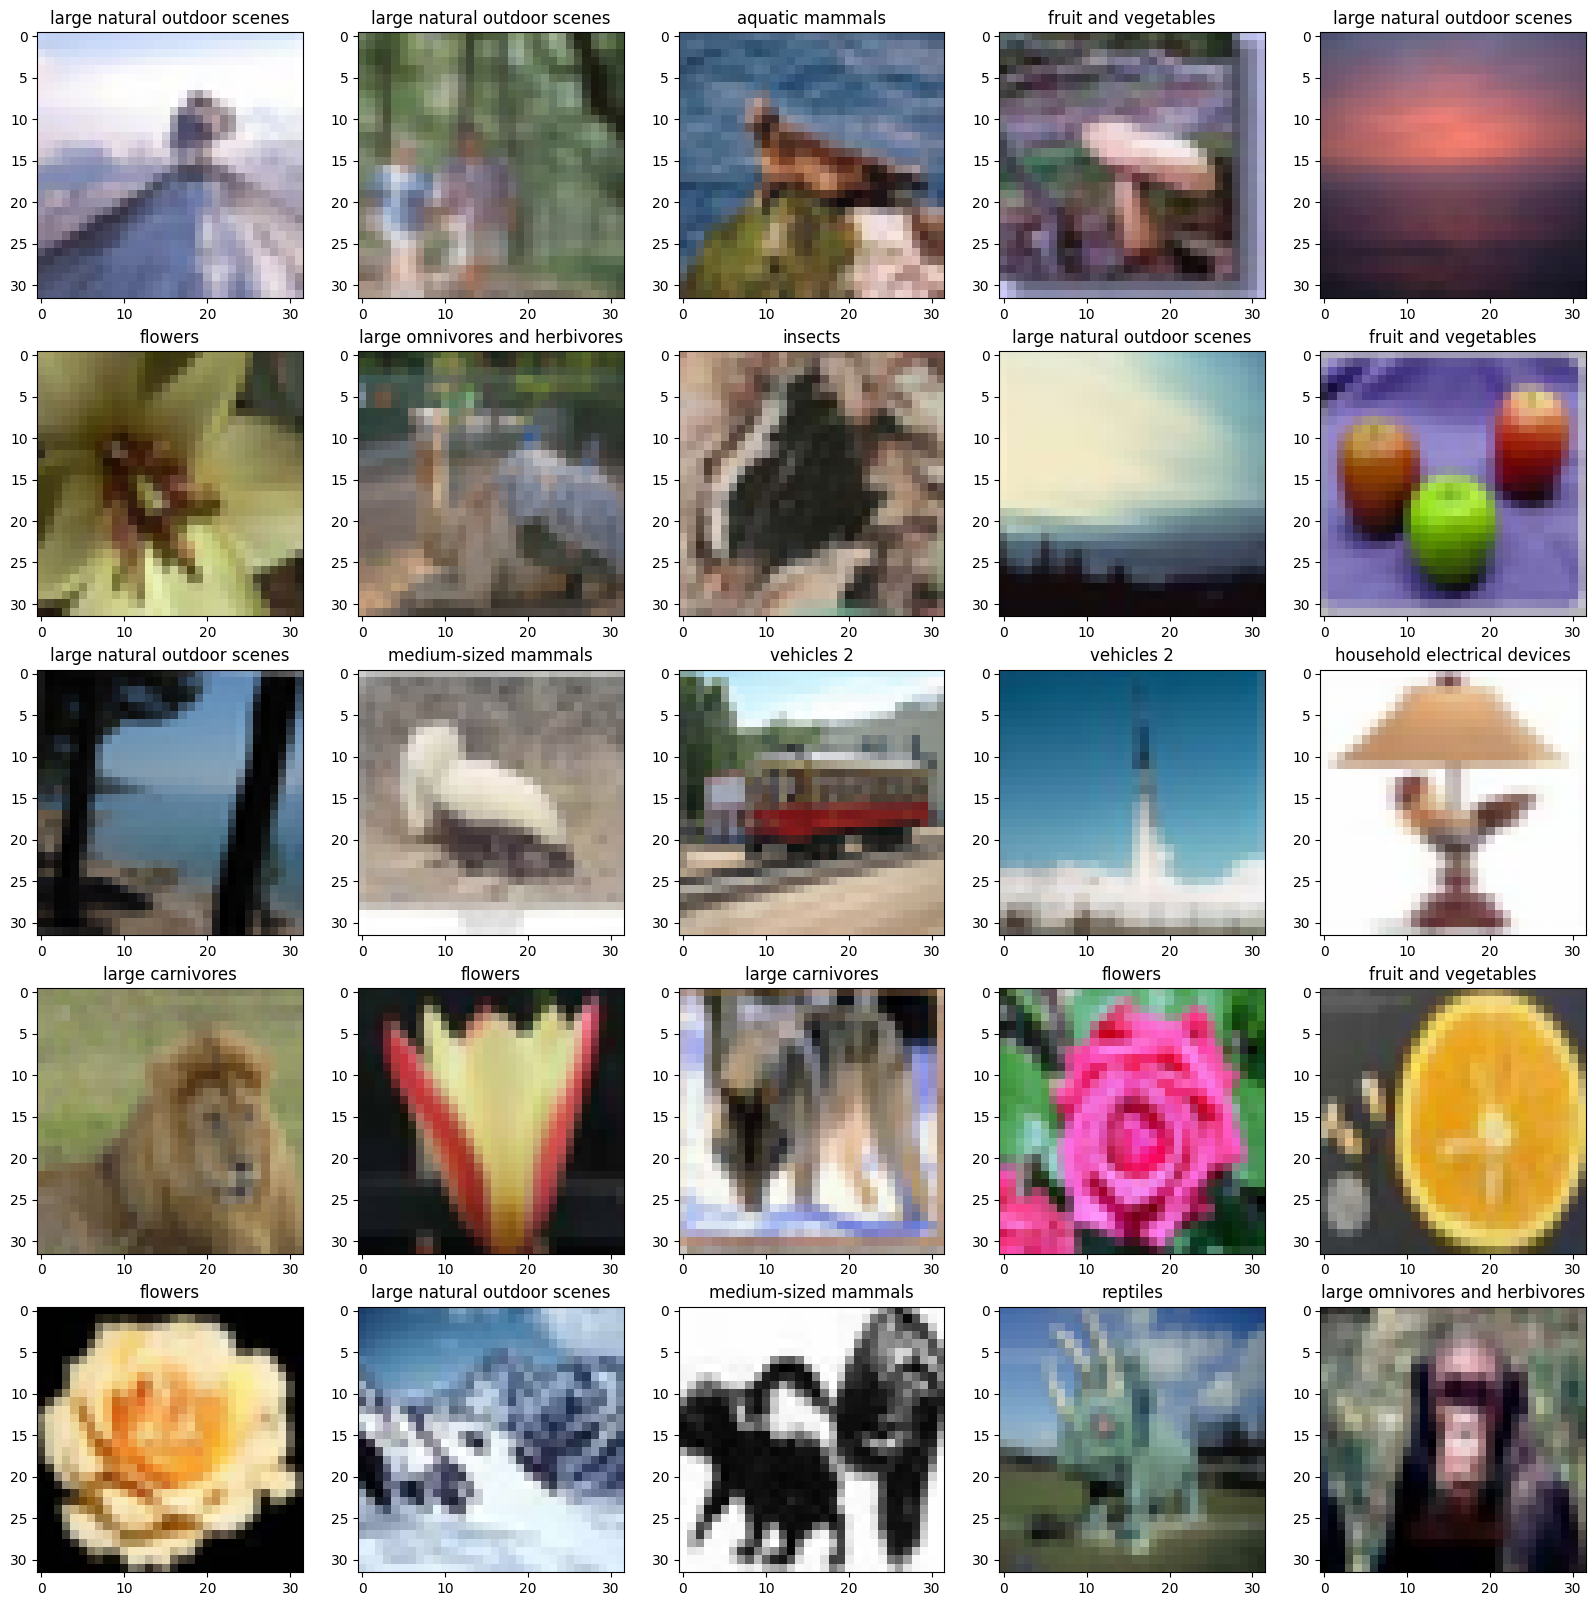

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  fromi=x_test[i]
  new_image = Image.fromarray(fromi)
  plt.imshow(new_image)
  n=int(y_test[i])
  plt.title(class_names[n])
plt.show()

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [39]:
from keras import  layers, models

In [29]:
from tensorflow.keras import models,layers
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(160,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(80,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20,activation='relu')

])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 64)        16448     
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                

In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50,batch_size=64)

Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 2.9468 - accuracy: 0.0771
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 2.9071 - accuracy: 0.0920
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 2.8796 - accuracy: 0.1093
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 2.7917 - accuracy: 0.1608
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 2.6620 - accuracy: 0.1986
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 2.5618 - accuracy: 0.2270
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 2.4877 - accuracy: 0.2509
Epoch 8/50
782/782 [==============================] - 6s 7ms/step - loss: 2.4381 - accuracy: 0.2687
Epoch 9/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3868 - accuracy: 0.2840
Epoch 10/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3399 - accuracy: 0.2996

In [31]:

model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0959 - accuracy: 0.4216


[2.0959134101867676, 0.42160001397132874]

Plot the training accuracy vs number of epochs graph. Print the test accuracy.

Text(0, 0.5, 'ACCURACY')

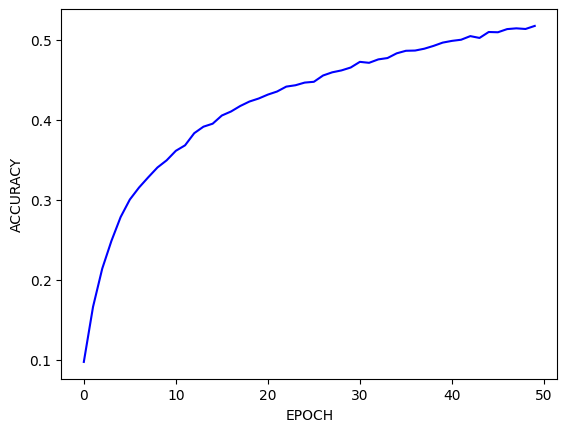

In [22]:
acc=model.history.history['accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'b')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')

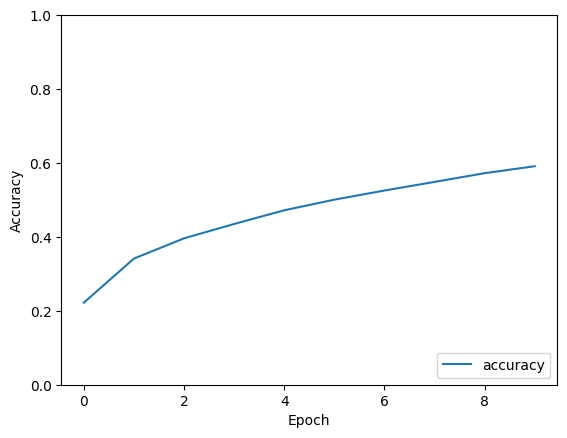

In [1]:
from tensorflow.keras import models,layers
model3=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(2,2),activation='relu'),
    layers.Conv2D(128,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(160,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(80,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20,activation='relu')

])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       65664     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                   

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [9]:
# model2 = models.Sequential()
# model2.add(layers.Conv2D(64, (7, 7),strides=(2, 2), padding='same'))
# model2.add(layers.BatchNormalization())
# model2.add(layers.Activation('relu'))
# model2.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
# model2.add(layers.Conv2D(64,(3,3),strides=(1,1), padding='same') )
# model2.add(layers.BatchNormalization())
# model2.add(layers.Activation('relu'))
# model2.add(layers.Conv2D(128,(3,3),strides=(1,1), padding='same') )
# model2.add(layers.BatchNormalization())
# model2.add(layers.Activation('relu'))
# model2.add(layers.Conv2D(256,(3,3),strides=(1,1), padding='same') )
# model2.add(layers.BatchNormalization())
# model2.add(layers.Activation('relu'))
# # model2.add(layers.Conv2D(512,(3,3),strides=(1,1, padding='same')) )
# # model2.add(layers.BatchNormalization())
# # model2.add(layers.Activation('relu'))
# model2.add(layers.GlobalAveragePooling2D())
# model2.add(layers.Dense(20))
model2=keras.Sequential([
    layers.Conv2D(64,(7,7),strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((3,3),strides=(2,2)),
    layers.Conv2D(64,(3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(256,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(512,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(20),
]
)

In [11]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=50,batch_size=64)

Epoch 1/50
782/782 [==============================] - 10s 8ms/step - loss: 1.8740 - accuracy: 0.4170
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5910 - accuracy: 0.4976
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 1.3986 - accuracy: 0.5556
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.2330 - accuracy: 0.6048
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.0741 - accuracy: 0.6537
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 0.9202 - accuracy: 0.7003
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.7605 - accuracy: 0.7517
Epoch 8/50
782/782 [==============================] - 6s 7ms/step - loss: 0.6035 - accuracy: 0.8052
Epoch 9/50
782/782 [==============================] - 5s 7ms/step - loss: 0.4656 - accuracy: 0.8458
Epoch 10/50
782/782 [==============================] - 5s 6ms/step - loss: 0.3551 - accuracy: 0.884

In [12]:

model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 3.3746 - accuracy: 0.5473


[3.3745784759521484, 0.5472999811172485]